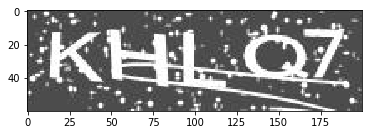

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../../Downloads/CaptchaImage.jpeg')
plt.imshow(img)


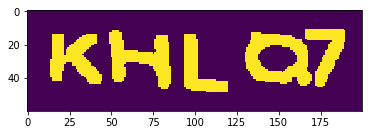

In [12]:
kernel = np.ones((4,4), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)
# plt.imshow(erosion)
blurred = cv2.GaussianBlur(erosion, (5,5), 0)
# plt.imshow(blurred)
edged = cv2.Canny(blurred, 30, 150)
# plt.imshow(edged)
dilation = cv2.dilate(edged, kernel, iterations=1)
# plt.imshow(dilation)

In [25]:
image, counters, h = cv2.findContours(dilation.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in counters], key = lambda x: x[1])

ary=[]

for c, _ in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    print(x,y,w,h)
    if w > 23 and h > 25:
        ary.append((x, y, w, h))


14 14 31 30
49 12 37 35
94 14 26 35
130 13 40 32
137 20 25 18
166 11 24 35


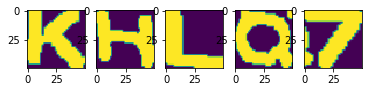

In [27]:
fig = plt.figure()
for id, (x, y, w, h) in enumerate(ary):
    roi = dilation[y:y+h, x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    res = cv2.resize(thresh, (50,50))
    plt.imshow(res)
    